# Defining Questions

- What are the customer preferences regarding products, and are there significant differences between the best-selling and least-selling products?

- What is the demographic profile of customers who are most active in making purchases?

- Is there a specific pattern in customer purchasing behavior during certain seasons?

- How is customer purchasing behavior influenced by discounts and the use of promo codes?

- What percentage of customers subscribe to products or services when making a purchase?

- Which payment methods are most commonly used by customers?

# Import Library

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gathering Data

Source: [Consumer Behavior and Shopping Habits Dataset](https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset/data)

In [3]:
od.download('https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: semidust
Your Kaggle Key: ··········


100%|██████████| 146k/146k [00:00<00:00, 76.4MB/s]

In [4]:
df = pd.read_csv('/content/consumer-behavior-and-shopping-habits-dataset/shopping_behavior_updated.csv')

df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


## Assessing Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [6]:
print('Missing Values:'.upper())
print(df.isna().sum())

print('____________________')
print('\nDuplicates:'.upper())
print(f'There is {df.duplicated().sum()} duplicates')

MISSING VALUES:
Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64
____________________

DUPLICATES:
There is 0 duplicates


In [7]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


Overall, the data has good quality as there are no missing values, duplicates, or inaccurate data.

# Exploratory Data Analysis (EDA)

- The number of customers based on age.
> 18 - 30 years: Young adults <br>
31 - 50 years: Middle-aged adults <br>
51 years and above: Senior adults



In [8]:
df['Age Group'] = df['Age'].apply(lambda x: 'Young' if x <= 30 else ('Senior' if x > 51 else 'Middle-aged'))

In [9]:
byage = df.groupby('Age Group').agg({
    'Customer ID': 'nunique'
}).rename(columns={'Customer ID': 'Customer Count'})

byage

,Customer Count
Age Group,
Middle-aged,1547
Senior,1404
Young,949


- The number of customers based on gender.

In [10]:
bygender = df.groupby('Gender').agg({
    'Customer ID': 'nunique'
}).rename(columns={'Customer ID': 'Customer Count'})

bygender

,Customer Count
Gender,
Female,1248
Male,2652


- The number of customers based on item purchased and category.

In [11]:
bycategory = df.groupby('Category').agg({
    'Customer ID': 'nunique'
}).rename(columns={'Customer ID': 'Customer Count'})

bycategory

,Customer Count
Category,
Accessories,1240
Clothing,1737
Footwear,599
Outerwear,324


In [12]:
byitems = df.groupby(['Category', 'Item Purchased']).agg({
    'Customer ID': 'nunique'
}).rename(columns={'Customer ID': 'Customer Count'})

byitems

Customer Count
Category    Item Purchased                
Accessories Backpack                   143
            Belt                       161
            Gloves                     140
            Handbag                    153
            Hat                        154
            Jewelry                    171
            Scarf                      157
            Sunglasses                 161
Clothing    Blouse                     171
            Dress                      166
            Hoodie                     151
            Jeans                      124
            Pants                      171
            Shirt                      169
            Shorts                     157
            Skirt                      158
            Socks                      159
            Sweater                    164
            T-shirt                    147
Footwear    Boots                      144
            Sandals                    160
            Shoes                      150
            Sneakers                   145
Outerwear   Coat                       161
            Jacket                     163

- Customer preferences regarding products

In [13]:
product_size = df.groupby('Size').agg({
    'Customer ID': 'nunique'
}).rename(columns={'Customer ID': 'Customer Count'})

product_size

,Customer Count
Size,
L,1053
M,1755
S,663
XL,429


In [14]:
product_color = df.groupby('Color').agg({
    'Customer ID': 'nunique'
}).rename(columns={'Customer ID': 'Customer Count'})

product_color.sort_values(by='Customer Count', ascending=False).head()

,Customer Count
Color,
Olive,177
Yellow,174
Silver,173
Teal,172
Green,169


- The number of customers based on purchase amount.

In [15]:
byamount = df.groupby('Purchase Amount (USD)').agg({
    'Customer ID': 'nunique'
}).rename(columns={'Customer ID': 'Customer Count'})

byamount.sort_index(ascending=False).head()

,Customer Count
Purchase Amount (USD),
100,36
99,52
98,52
97,55
96,53


- The number of customers based on location.

In [16]:
byloc = df.groupby('Location').agg({
    'Customer ID': 'nunique'
}).rename(columns={'Customer ID': 'Customer Count'})

byloc.sort_values('Customer Count', ascending=False).head()

,Customer Count
Location,
Montana,96
California,95
Idaho,93
Illinois,92
Alabama,89


- The number of customers based on season.

In [17]:
byseason = df.groupby('Season').agg({
    'Customer ID': 'nunique'
}).rename(columns={'Customer ID': 'Customer Count'})

byseason

,Customer Count
Season,
Fall,975
Spring,999
Summer,955
Winter,971


- The number of customers based on review rating.
> Below 3.5: Fair <br> 3.5 - 3.9: Decent <br> Above 4.0: Excellent

In [18]:
df['Rating Group'] = df['Review Rating'].apply(lambda x: 'Fair' if x < 3.5 else('Excellent' if x >= 4 else 'Decent'))

In [19]:
byrating = df.groupby('Rating Group').agg({
    'Customer ID': 'nunique'
}).rename(columns={'Customer ID': 'Customer Count'})

byrating

,Customer Count
Rating Group,
Decent,766
Excellent,1644
Fair,1490


- The number of customers based on subscription status.

In [20]:
bysubs = df.groupby('Subscription Status').agg({
    'Customer ID': 'nunique'
}).rename(columns={'Customer ID': 'Customer Count'})

bysubs

,Customer Count
Subscription Status,
No,2847
Yes,1053


- The number of customers based on shipping type.

In [21]:
byshipping = df.groupby('Shipping Type').agg({
    'Customer ID': 'nunique'
}).rename(columns={'Customer ID': 'Customer Count'})

byshipping

,Customer Count
Shipping Type,
2-Day Shipping,627
Express,646
Free Shipping,675
Next Day Air,648
Standard,654
Store Pickup,650


- The number of customers based on discount applied and promo code used.

In [22]:
bydisc_promo = df.groupby(['Discount Applied', 'Promo Code Used']).agg({
    'Customer ID': 'nunique'
}).rename(columns={'Customer ID': 'Customer Count'})

bydisc_promo

,,Customer Count
Discount Applied,Promo Code Used,
No,No,2223
Yes,Yes,1677


- The number of customers based on payment method.

In [23]:
bypayment = df.groupby('Payment Method').agg({
    'Customer ID': 'nunique'
}).rename(columns={'Customer ID': 'Customer Count'})

bypayment

,Customer Count
Payment Method,
Bank Transfer,612
Cash,670
Credit Card,671
Debit Card,636
PayPal,677
Venmo,634


- The number of customers based on frequency of purchases.

In [24]:
byfrequency = df.groupby('Frequency of Purchases').agg({
    'Customer ID': 'nunique'
}).rename(columns={'Customer ID': 'Customer Count'})

byfrequency

,Customer Count
Frequency of Purchases,
Annually,572
Bi-Weekly,547
Every 3 Months,584
Fortnightly,542
Monthly,553
Quarterly,563
Weekly,539


# Visualization & Explanatory Analysis

## What is the demographic profile of customers who are most active in making purchases?

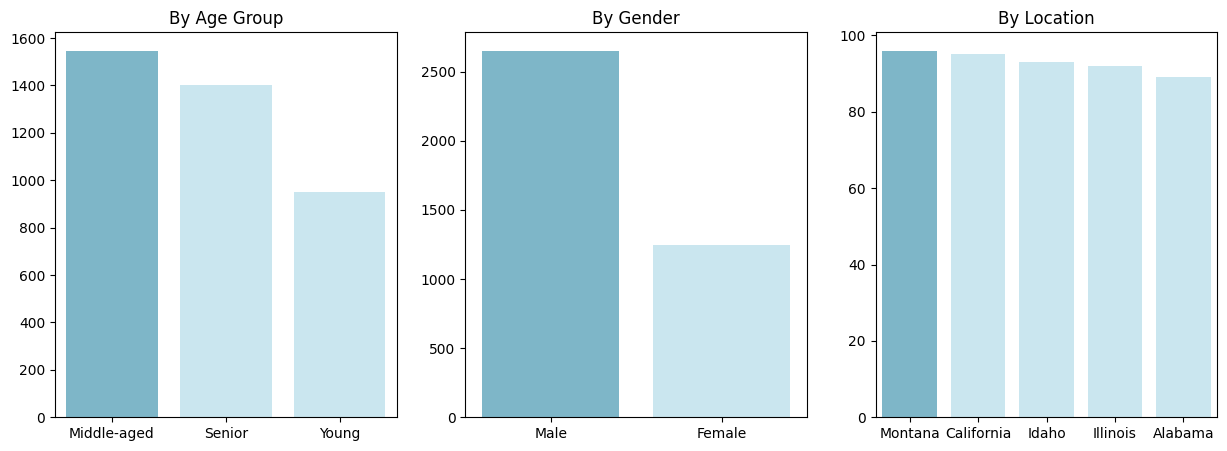

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
colors = ['#72BCD4', '#C4E9F5', '#C4E9F5', '#C4E9F5', '#C4E9F5']

sns.barplot(
    data=byage.sort_values(by='Customer Count', ascending=False).reset_index(),
    x='Age Group',
    y='Customer Count',
    palette=colors,
    ax=ax[0]
)
ax[0].set_title('By Age Group')

sns.barplot(
    data=bygender.sort_values(by='Customer Count', ascending=False).reset_index(),
    x='Gender',
    y='Customer Count',
    palette=colors,
    ax=ax[1]
)
ax[1].set_title('By Gender')

sns.barplot(
    data=byloc.reset_index().sort_values(by='Customer Count', ascending=False).head(),
    x='Location',
    y='Customer Count',
    palette=colors,
    ax=ax[2]
)
ax[2].set_title('By Location')

for i in range(3):
  ax[i].set_xlabel(None)
  ax[i].set_ylabel(None)

The demographic profile of customers who are most active in making purchases is as follows: they are in the middle-aged category, male, and from the state of Montana.

## What are the customer preferences regarding products, and are there significant differences between the best-selling and least-selling products?

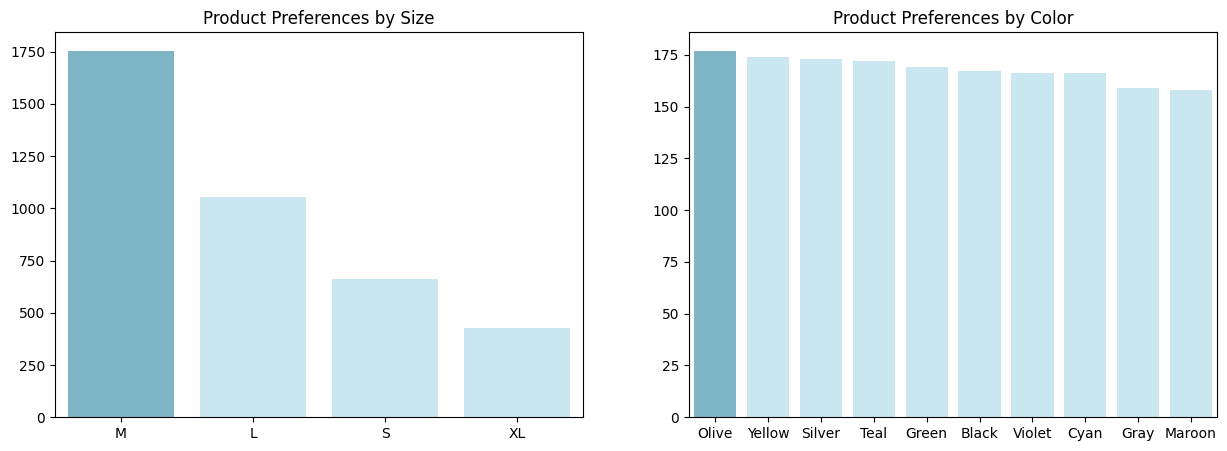

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
colors = ['#72BCD4', '#C4E9F5', '#C4E9F5', '#C4E9F5', '#C4E9F5', '#C4E9F5', '#C4E9F5', '#C4E9F5', '#C4E9F5', '#C4E9F5']

sns.barplot(
    data=product_size.reset_index().sort_values(by='Customer Count', ascending=False),
    x='Size',
    y='Customer Count',
    palette=colors,
    ax=ax[0]
)
ax[0].set_title('Product Preferences by Size')

sns.barplot(
    data=product_color.reset_index().sort_values(by='Customer Count', ascending=False).head(10),
    x='Color',
    y='Customer Count',
    palette=colors,
    ax=ax[1]
)
ax[1].set_title('Product Preferences by Color')

for i in range(2):
  ax[i].set_xlabel(None)
  ax[i].set_ylabel(None)


Based on size and color, the most sold products are size M and olive-colored.

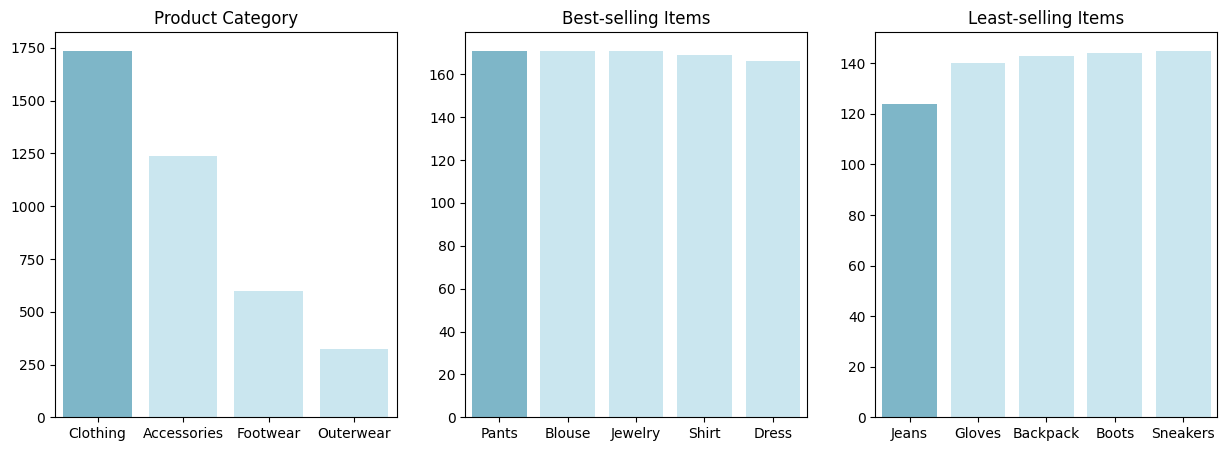

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

sns.barplot(
    data=bycategory.sort_values(by='Customer Count', ascending=False).reset_index(),
    x='Category',
    y='Customer Count',
    palette=colors,
    errorbar=None,
    ax=ax[0]
)
ax[0].set_title('Product Category')

sns.barplot(
    data=byitems.sort_values(by='Customer Count', ascending=False).reset_index().head(),
    x='Item Purchased',
    y='Customer Count',
    palette=colors,
    ax=ax[1]
)
ax[1].set_title('Best-selling Items')

sns.barplot(
    data=byitems.sort_values(by='Customer Count', ascending=True).reset_index().head(),
    x='Item Purchased',
    y='Customer Count',
    palette=colors,
    ax=ax[2]
)
ax[2].set_title('Least-selling Items')

for i in range(3):
  ax[i].set_xlabel(None)
  ax[i].set_ylabel(None)

The most favored product category is clothing, with the best-selling item is pants, while the least-selling item is jeans. However, it should be noted that the difference between these two items is not too significant.

## Is there a specific pattern in customer purchasing behavior during certain seasons?

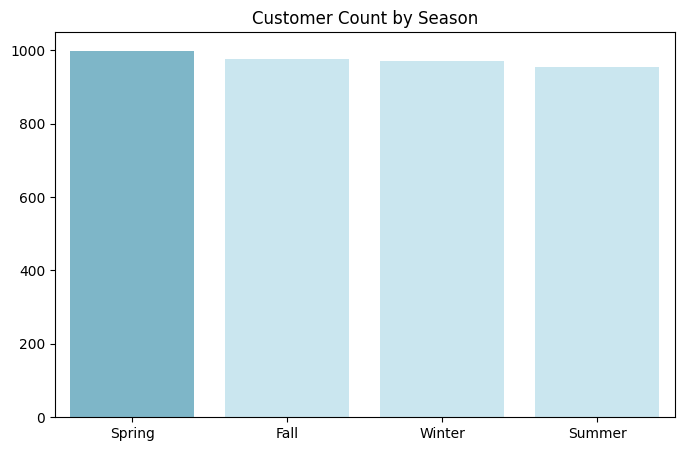

In [28]:
plt.figure(figsize=(8,5))

sns.barplot(
    data=byseason.reset_index().sort_values(by='Customer Count', ascending=False),
    x='Season',
    y='Customer Count',
    palette=colors
)
plt.title('Customer Count by Season')
plt.xlabel(None)
plt.ylabel(None)

plt.show()

From the graph, it can be observed that there is no significant difference between seasons, showing no specific pattern in customer purchasing behavior.

## How is customer purchasing behavior influenced by discounts and the use of promo codes?

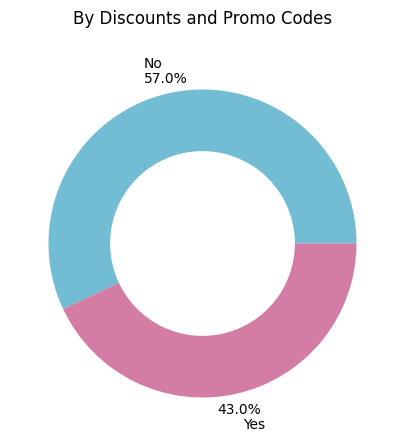

In [29]:
plt.figure(figsize=(8,5))
colors = ['#72BCD4', '#D47DA4']

plt.pie(
    data=bydisc_promo.reset_index(),
    x='Customer Count',
    labels='Discount Applied',
    autopct="%.1f%%",
    colors=colors,
    wedgeprops={'width': 0.4},
    labeldistance=1.2,
    pctdistance=1.1
)

plt.title('By Discounts and Promo Codes', pad=20)
plt.show()

More customers do not use discounts and promo codes when making purchases, showing that discounts and promotions do not significantly influence customer purchasing behavior.

## What percentage of customers subscribe to products or services when making a purchase?

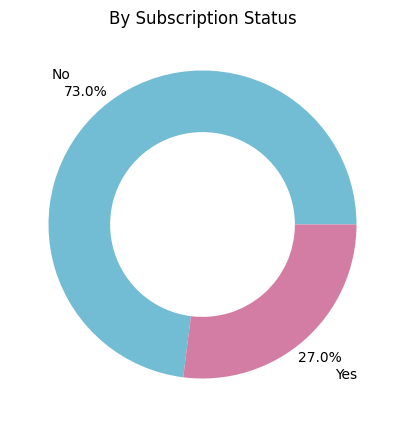

In [30]:
plt.figure(figsize=(8,5))
colors = ['#72BCD4', '#D47DA4']

plt.pie(
    data=bysubs.reset_index(),
    x='Customer Count',
    labels='Subscription Status',
    autopct="%.1f%%",
    colors=colors,
    wedgeprops={'width': 0.4},
    labeldistance=1.3,
    pctdistance=1.15
)

plt.title('By Subscription Status')
plt.show()

Out of the total customers, about 27% subscribe when making a purchase, which means the majority do not subscribe.

## Which payment methods are most commonly used by customers?

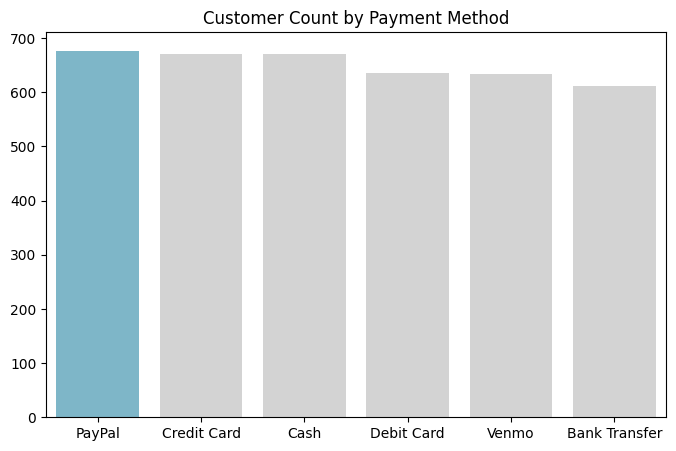

In [31]:
plt.figure(figsize=(8,5))
colors = ['#72BCD4', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3']

sns.barplot(
    data=bypayment.reset_index().sort_values(by='Customer Count', ascending=False),
    x='Payment Method',
    y='Customer Count',
    palette=colors
)
plt.title('Customer Count by Payment Method')
plt.xlabel(None)
plt.ylabel(None)

plt.show()

The most commonly used payment method by customers is PayPal.

# Conclusion

In conclusion, active customers are typically middle-aged males from Montana. The best-selling category is clothing, particularly pants, with no significant difference from the least-sold item, jeans. It seems like people purchase items quite similarly in different seasons, and not many of them really use the discounts. About 27% subscribe, and PayPal is the preferred payment method.